# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Farhad Fallah
2.   Student Number: 97102214


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
data = dataset[['X','Y']].to_numpy()
x_train = data[0:400,0]
y_train = data[0:400,1]

x_test = data[400: , 0]
y_test = data[400: , 1]


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

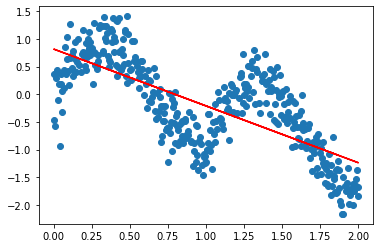

(0.8150063409602608, -1.0264173819380156)


In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

#x = np.array([1,2,3,4,5,6,7,8,9])
#y = np.array([2,4,6,8,10,13,14,16,18])

x = x_train
y = y_train
n = np.size(x)

mx = np.mean(x)
my = np.mean(y)

xy = np.sum(y*x) - n*my*mx
xx = np.sum(x*x) - n*mx*mx

b1 = xy / xx
b0 = my - b1*mx
b = (b0,b1)
y_pred = b[0] + b[1]*x


plt.scatter(x, y)
plt.plot(x, y_pred, color = "r")
plt.show()

print(b)
m = (b1,b0)

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train ,predicted_train_y )
test_error = mean_squared_error(y_test ,predicted_test_y )

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

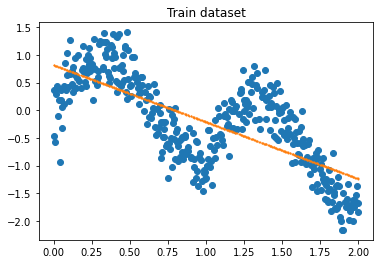

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

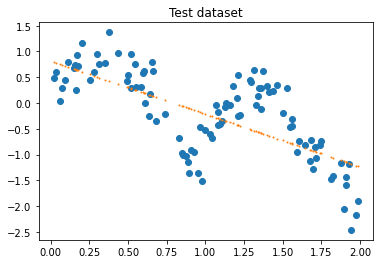

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

-write here-

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        #print((xi.shape,the_query_point.shape))

        W[i, i] = np.exp(-np.dot((xi-the_query_point) , (xi-the_query_point).T) /(2*hyperparameter**2)  )
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    #print(train_X.reshape(400,1).shape , np.ones((l, 1)).shape)
    X = np.hstack((train_X.reshape(400,1), np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    #print(X.T.shape , W.shape , X.shape , train_Y.shape )

    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * train_Y.reshape(400,1)))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
#print(type(x_train))
predicted_test = [predict(x_train, y_train, query, 0.01) for query in x_test]
l = len(predicted_test)
predicted_test = np.array(predicted_test).reshape(100,1)
print((predicted_test).shape)

error = mean_squared_error(y_test ,predicted_test )
print(f"MSE test error: {error}")

(100, 1)
MSE test error: 0.09575447403728388


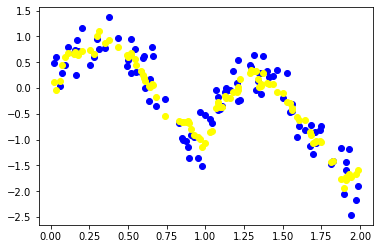

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

همانطور که مشاهده میشود عملکرد مدل ما بسیار بهتر است،زیرا در این مدل به داده های آموزشی که نزدیک کوئری ما قرار دارد بیشتر توجه میشود و به صورت محلی مورد بررسی قرار میگیرد.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

با توجه به اینکه احتمال میدهیم داده های تست هم حول داده های آموزش قرار داشته باشد

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2)
        return distance

    def return_nn_ids(self, x):
        dist = [self.distance(x,xi) for xi in self.X]
        dist = np.array(dist)
        indices = np.argpartition(dist , self.k)
        #print(indices[:k].shape)
        return indices[:k]

    def predict(self, x):
        nearest_indices = self.return_nn_ids(x)
        nearest_neighbors = self.Y[nearest_indices]
        predicted_y = nearest_neighbors.mean()
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test ,predicted_y)
    return error, predicted_y

In [13]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09695931959882734


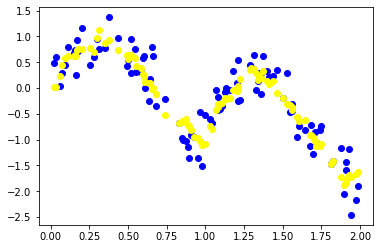

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

مشاهده میشود که دقت این روش تقریبا مشابه روش قبل است و به ازای 7همسایه نزدیک بهترین نتیجه حاصل گردید